# Estimate cost method 1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Input data
data = {
    "train": [100 * 2, 500 * 2, 500 * 2, 50 * 2, 1000 * 2, 1134 + 298, 314 + 105, 1228 + 410, 1228 + 410],
    "iter": [7, 6, 8, 3, 10, 10, 3, 5, 10],
    "k": [3, 3, 6, 20, 20, 20, 3, 3, 20],
    "cost": [0.96, 2.58, 3.56, 1.10, 8.58, 8.77, 1.27, 3.39, 9.72]
}

# Create DataFrame
df = pd.DataFrame(data)

# Log-transform the variables
df["log_train"] = np.log(df["train"])
df["log_iter"] = np.log(df["iter"])
df["log_k"] = np.log(df["k"])
df["log_cost"] = np.log(df["cost"])

df

,train,iter,k,cost,log_train,log_iter,log_k,log_cost
0,200,7,3,0.96,5.298317,1.945910,1.098612,-0.040822
1,1000,6,3,2.58,6.907755,1.791759,1.098612,0.947789
2,1000,8,6,3.56,6.907755,2.079442,1.791759,1.269761
3,100,3,20,1.10,4.605170,1.098612,2.995732,0.095310
4,2000,10,20,8.58,7.600902,2.302585,2.995732,2.149434
5,1432,10,20,8.77,7.266827,2.302585,2.995732,2.171337
6,419,3,3,1.27,6.037871,1.098612,1.098612,0.239017
7,1638,5,3,3.39,7.401231,1.609438,1.098612,1.220830
8,1638,10,20,9.72,7.401231,2.302585,2.995732,2.274186


In [ ]:
# Prepare the input and target variables
X = df[["log_train", "log_iter", "log_k"]]
y = df["log_cost"]

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract coefficients and intercept
alpha = np.exp(model.intercept_)
beta1, beta2, beta3 = model.coef_

print("Fitted Model Parameters:")
print(f"Alpha (scaling factor): {alpha:.4f}")
print(f"Beta1 (train exponent): {beta1:.4f}")
print(f"Beta2 (iter exponent): {beta2:.4f}")
print(f"Beta3 (k exponent): {beta3:.4f}")

# Function to predict costs
def predict_cost(train, iter, k):
    return alpha * (train ** beta1) * (iter ** beta2) * (k ** beta3)

Fitted Model Parameters:
Alpha (scaling factor): 0.0132
Beta1 (train exponent): 0.6335
Beta2 (iter exponent): 0.2455
Beta3 (k exponent): 0.4179


In [ ]:
# Predicted costs
df["predicted_cost"] = predict_cost(df["train"], df["iter"], df["k"])

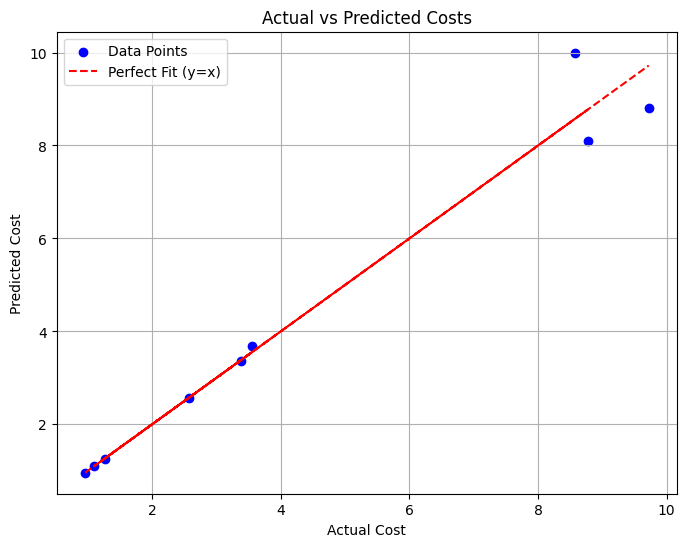

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted cost
plt.figure(figsize=(8, 6))
plt.scatter(df["cost"], df["predicted_cost"], color="blue", label="Data Points")
plt.plot(df["cost"], df["cost"], color="red", linestyle="--", label="Perfect Fit (y=x)")

# Add labels, title, and legend
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs Predicted Costs")
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [ ]:
# Test the function with new data
new_train = 1228 + 410
new_iter = 10
new_k = 20
predicted_cost = predict_cost(new_train, new_iter, new_k)
print(f"Predicted Cost for train={new_train}, iter={new_iter}, k={new_k}: ${predicted_cost:.2f}")

Predicted Cost for train=1638, iter=10, k=20: $8.44


# Estimate cost method 2

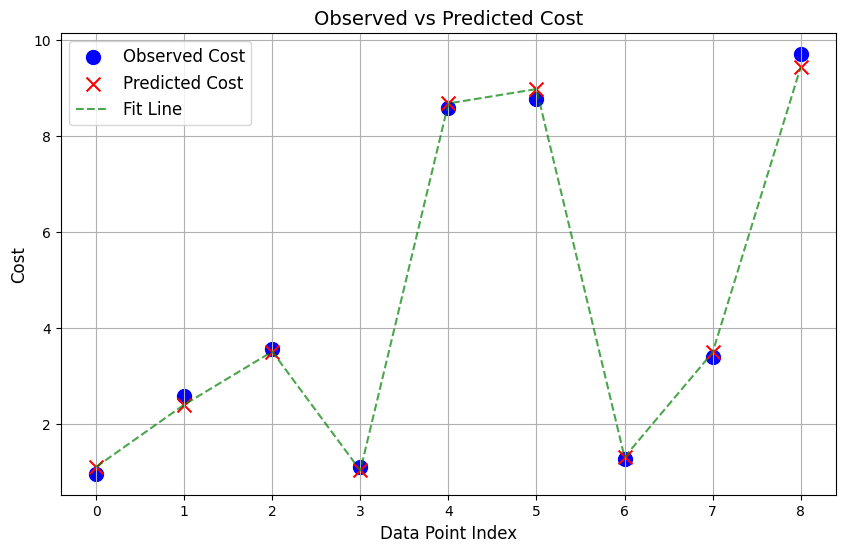

Optimized Parameters:
alpha: 0.0170
beta1: 0.5776
d1: 0.2790
beta2: 0.4608
beta3: 0.3562


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Input data
train = np.array([100, 500, 500, 50, 1000, 1134, 314, 1228, 1228])
validation = np.array([100, 500, 500, 50, 1000, 298, 105, 410, 410])
iter_ = np.array([7, 6, 8, 3, 10, 10, 3, 5, 10]) # 10
k = np.array([3, 3, 6, 20, 20, 20, 3, 3, 20]) # 20
cost = np.array([0.96, 2.58, 3.56, 1.10, 8.58, 8.77, 1.27, 3.39, 9.72]) #

# Define the cost function
def cost_function(x_data, alpha, beta1, d1, beta2, beta3):
    train, validation, iter_, k = x_data
    return alpha * ((train ** beta1) + (validation ** d1)) * (iter_ ** beta2) * (k ** beta3)

# Initial guesses for the parameters
initial_params = [1, 1, 1, 1, 1]

# Fit the model using curve_fit
params_opt, params_cov = curve_fit(
    cost_function,
    (train, validation, iter_, k),  # Input data tuple
    cost,  # Observed cost values
    p0=initial_params  # Initial parameter guesses
)

# Predicted cost based on optimized parameters
predicted_cost = cost_function((train, validation, iter_, k), *params_opt)

# Plot the observed vs. predicted cost
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cost)), cost, label="Observed Cost", color="blue", s=100, marker='o')
plt.scatter(range(len(cost)), predicted_cost, label="Predicted Cost", color="red", s=100, marker='x')
plt.plot(range(len(cost)), predicted_cost, label="Fit Line", color="green", linestyle="--", alpha=0.7)
plt.title("Observed vs Predicted Cost", fontsize=14)
plt.xlabel("Data Point Index", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Output the optimized parameters
print("Optimized Parameters:")
print(f"alpha: {params_opt[0]:.4f}")
print(f"beta1: {params_opt[1]:.4f}")
print(f"d1: {params_opt[2]:.4f}")
print(f"beta2: {params_opt[3]:.4f}")
print(f"beta3: {params_opt[4]:.4f}")

In [ ]:
# Function to predict new costs
def predict_new_cost(new_train, new_validation, new_iter, new_k):
    new_cost = cost_function(
        (np.array([new_train]), np.array([new_validation]), np.array([new_iter]), np.array([new_k])),
        *params_opt
    )
    return new_cost[0]

# Example: Predict a new cost
new_train = 1228
new_validation = 410
new_iter = 10
new_k = 20

new_cost = predict_new_cost(new_train, new_validation, new_iter, new_k)
print(f"Predicted Cost for new inputs (train={new_train}, validation={new_validation}, iter={new_iter}, k={new_k}): {new_cost:.4f}")

Predicted Cost for new inputs (train=1228, validation=410, iter=10, k=20): 9.4377


# Parse Natural Parameters

In [ ]:
import re
import pandas as pd

text = """
10910 provides multiple sources or references; specifically, the text includes citations or links to other articles, studies, or data sources. For example, 'Jonathan has indicated he wants to run again in the February presidential elections...' followed by several source links.: 0.43881450501644553
10911 analyzes geopolitical context; specifically, the text offers an analysis of international relations or geopolitical events. For example, 'Ukraine announced it was no longer pursuing NATO membership.': -0.17841705517584586
10912 includes external sources or links; specifically, the text references an external source or includes a hyperlink to support claims. For example, 'the results of the election won't have been finalized by then': 0.14989098305783224
10913 contains hyperlinks to sources; specifically, the text includes a hyperlink directing to an external source for additional information. For example, 'Per the article, speaking before AIPAC instead Congress is a viable option. http://www.reuters.com/article/2015/02/09/us-israel-netanyahu-congress-idUSKBN0LD1MF20150209.': 0.1153585931348319
10914 mentions economic factors; specifically, the text discusses economic conditions, indicators, or policies affecting the scenario. For example, 'Considering North Korea's belligerence, I think that it is likely that they will test a long range missile.': 0.06234378999214789
10915 mentions political figures or parties; specifically, the text refers to specific politicians, political parties, or government officials. For example, 'Jonathan has indicated he wants to run again in the February presidential elections.': -0.06512473431471318
10916 considers geopolitical factors; specifically, the text discusses how international relations or geopolitical strategies influence outcomes. For example, 'Considering North Korea's belligerence, I think that it is likely that they will test a long range missile by the closing date of the question.': -0.30180788908635614
10917 mentions collaboration or agreements between countries; specifically, the text refers to countries working together or discussing policies. For example, 'Both countries are working together on developing their targets.': 0.7478440285484759
10918 includes multiple reference or source links; specifically, the text provides citations or URLs to support its claims. For example, 'See e.g. The WSJ article on the subject from October 16.': -0.08119950494072051
10919 mentions economic indicators or macroeconomic trends; specifically, the text discusses aspects such as market performance, national economic policies, or global economic events. For example, 'Though oil prices are down and supply is up, demand can change as economies strengthen in Europe, US and elsewhere.': -0.20430086306016346
10920 is highly speculative; specifically, the text expresses uncertainty or conjecture about future events or outcomes. For example, 'It seems almost inevitable, based on the recent news from the US and the comments from others below.': -0.6297405426557127
10921 provides multiple perspectives; specifically, the text considers different viewpoints or scenarios within its discussion. For example, 'Both Abdullah and Ghani are on record promising to support the SOFA.': 0.1536695935179724
10922 addresses international policies or agreements; specifically, the text refers to international treaties, accords, or diplomatic efforts. For example, 'China is squeezing NK to talk: But the West is playing hard to get.': -0.24755228449370836
10923 includes geopolitical context; specifically, the text discusses geopolitical situations or events, mentioning countries or international relationships. For example, 'NATO puts RU troop level at 20K, with 8K added last week.': 0.16265781138468494
10924 includes references or citations; specifically, the text references articles, reports, or includes links to specific sources. For example, 'http://www.reuters.com/article/2014/08/18/uk-brazil-election-idUKKBN0GI0HJ20140818': 0.08094946450676503
10925 includes geopolitical context; specifically, the text references international relations or geopolitical strategies. For example, 'China is the wild card and it is not in China's interest to have further conflict.': 0.41772546304400515
10926 provides citations or external references; specifically, the text includes links or references to external sources to substantiate claims. For example, 'See the WSJ article on the subject from October 16: http://online.wsj.com.': -0.04312101769444021
10927 expresses a likelihood assessment; specifically, the text makes a qualitative assessment of the likelihood of an outcome, using words like 'likely', 'unlikely', 'inevitable', etc. For example, 'Based on this source, this is a tough one. Elections are scheduled to commence on 24 September, but these elections have been delayed a lot of times.': 0.18989445860270182
10928 includes historical or contextual references; specifically, the text mentions past events or current geopolitical context to support its prediction. For example, 'Historically they have used detonations as a way of focusing attention back on themselves.': -0.001398218915560311
10929 contains references to geopolitical events; specifically, the text includes mentions of specific countries, political leaders, or international relations dynamics. For example, 'Marina Silva's entry into Brazil's presidential race will almost certainly force the October election into a second-round runoff.': -0.13004387125526923
"""

# Updated regex pattern
pattern = re.compile(r"""
    \d{4}\s+                              # Match and skip the 4-digit number and space(s)
    (?P<parameter>[^;]+);                 # Capture the natural parameter before the semicolon
    (?P<explanation>.+?)                  # Capture explanation until 'For example'
    For\sexample,\s                       # Match 'For example,' and trailing space
    (?P<example>.*?):                     # Capture the example text ending at the colon
    \s(?P<w>-?\d+\.\d+)         # Capture the correlation value after the colon
""", re.VERBOSE)

# Parse the text using the regex pattern
matches = pattern.finditer(text)

# Create a list of dictionaries for the matches
data = []
for match in matches:
    data.append({
        "natural parameter": match.group("parameter").strip(),
        "explanation": match.group("explanation").strip(),
        "example": match.group("example").strip(),
        "w": float(match.group("w"))
    })

# Convert the data into a DataFrame
df = pd.DataFrame(data)


# Display the DataFrame
df

# negative w => class 0 (bad prediction)
# positive w => class 1 (good prediction)


,natural parameter,explanation,example,w
0,provides multiple sources or references,"specifically, the text includes citations or l...",'Jonathan has indicated he wants to run again ...,0.438815
1,analyzes geopolitical context,"specifically, the text offers an analysis of i...",'Ukraine announced it was no longer pursuing N...,-0.178417
2,includes external sources or links,"specifically, the text references an external ...",'the results of the election won't have been f...,0.149891
3,contains hyperlinks to sources,"specifically, the text includes a hyperlink di...","'Per the article, speaking before AIPAC instea...",0.115359
4,mentions economic factors,"specifically, the text discusses economic cond...","'Considering North Korea's belligerence, I thi...",0.062344
5,mentions political figures or parties,"specifically, the text refers to specific poli...",'Jonathan has indicated he wants to run again ...,-0.065125
6,considers geopolitical factors,"specifically, the text discusses how internati...","'Considering North Korea's belligerence, I thi...",-0.301808
7,mentions collaboration or agreements between c...,"specifically, the text refers to countries wor...",'Both countries are working together on develo...,0.747844
8,includes multiple reference or source links,"specifically, the text provides citations or U...",'See e.g. The WSJ article on the subject from ...,-0.081200
9,mentions economic indicators or macroeconomic ...,"specifically, the text discusses aspects such ...","'Though oil prices are down and supply is up, ...",-0.204301


In [ ]:
df.to_csv("natural_parameters.csv", index=False)

In [ ]:
import csv
import openai
from openai import OpenAI
import pandas as pd

# Set your OpenAI API key
OPEN_AI_API_KEY = "INSERT KEY"

# Read the input CSV
input_file = "natural_parameters.csv"  # Replace with your actual file path
output_file = "natural_parameters_reformatted.csv"

# Function to call GPT-4 API
def reword(row):
    client = OpenAI(api_key=OPEN_AI_API_KEY)
    natural_parameter = row["natural parameter"]
    explanation = row["explanation"]
    prompt = f"Given the following summary and explanation for what makes a good forecaster prediction, reword the explanation to start with 'The forecaster ...' and do not include the word 'specifically'. Output only the reworded explanation. Summary: {natural_parameter}; Explanation: {explanation}."
    print(prompt)
    response = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "system", "content": "You are a helpful assistant that rewords explanations."},
                {"role": "user", "content": prompt},
            ],
            max_tokens=500,
        )
    response_dict = response.to_dict()
    return response_dict['choices'][0]['message']['content']

# Read CSV into a DataFrame
data = pd.read_csv(input_file)

# Prepare reformatted rows
new_df = pd.DataFrame(columns=["Model_name", "Description"])
reformatted_rows = []
for _, row in data.iterrows():
    reworded_explanation = reword(row)
    # add to new df with columns 'Model_name' = row['natrual_parameter'], 'Description' = reworded_explanation
    new_df = pd.concat([new_df, pd.DataFrame({"Model_name": row["natural parameter"], "Description": reworded_explanation}, index=[0])], ignore_index=True)

# save new_df to csv
new_df.to_csv(output_file, index=False)

print(f"Reformatted CSV written to {output_file}")

Given the following summary and explanation for what makes a good forecaster prediction, reword the explanation to start with 'The forecaster ...' and do not include the word 'specifically'. Output only the reworded explanation. Summary: addresses geopolitical dynamics; Explanation: specifically, the text discusses international relations or geopolitical maneuvers..
Given the following summary and explanation for what makes a good forecaster prediction, reword the explanation to start with 'The forecaster ...' and do not include the word 'specifically'. Output only the reworded explanation. Summary: includes specific timeframes or deadlines; Explanation: specifically, the text sets or references a specific date or period for an event..
Given the following summary and explanation for what makes a good forecaster prediction, reword the explanation to start with 'The forecaster ...' and do not include the word 'specifically'. Output only the reworded explanation. Summary: cites multiple s

# Plot correlation

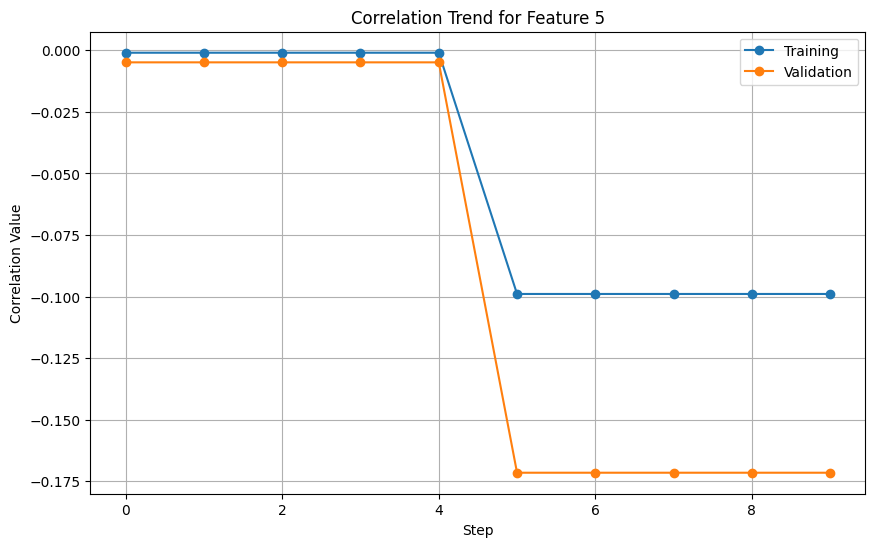

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data (replace 'train.csv' and 'val.csv' with your actual filenames or data sources)
train_data = pd.read_csv("wandb_export_2024-12-24T02_51_58.177-05_00.csv")  # Training correlation table
val_data = pd.read_csv("wandb_export_2024-12-24T02_52_02.290-05_00.csv")      # Validation correlation table

def plot_feature_correlation(feature_name):
    # Filter data for the specific feature
    train_feature_data = train_data[train_data["lineKey"] == feature_name]
    val_feature_data = val_data[val_data["lineKey"] == feature_name]

    # Plot the training and validation correlations
    plt.figure(figsize=(10, 6))
    plt.plot(train_feature_data["step"], train_feature_data["lineVal"], label="Training", marker="o")
    plt.plot(val_feature_data["step"], val_feature_data["lineVal"], label="Validation", marker="o")

    # Add labels, title, and legend
    plt.title(f"Correlation Trend for {feature_name}")
    plt.xlabel("Step")
    plt.ylabel("Correlation Value")
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

# Example usage: Replace 'Feature 0' with the feature you want to plot
plot_feature_correlation("Feature 5")

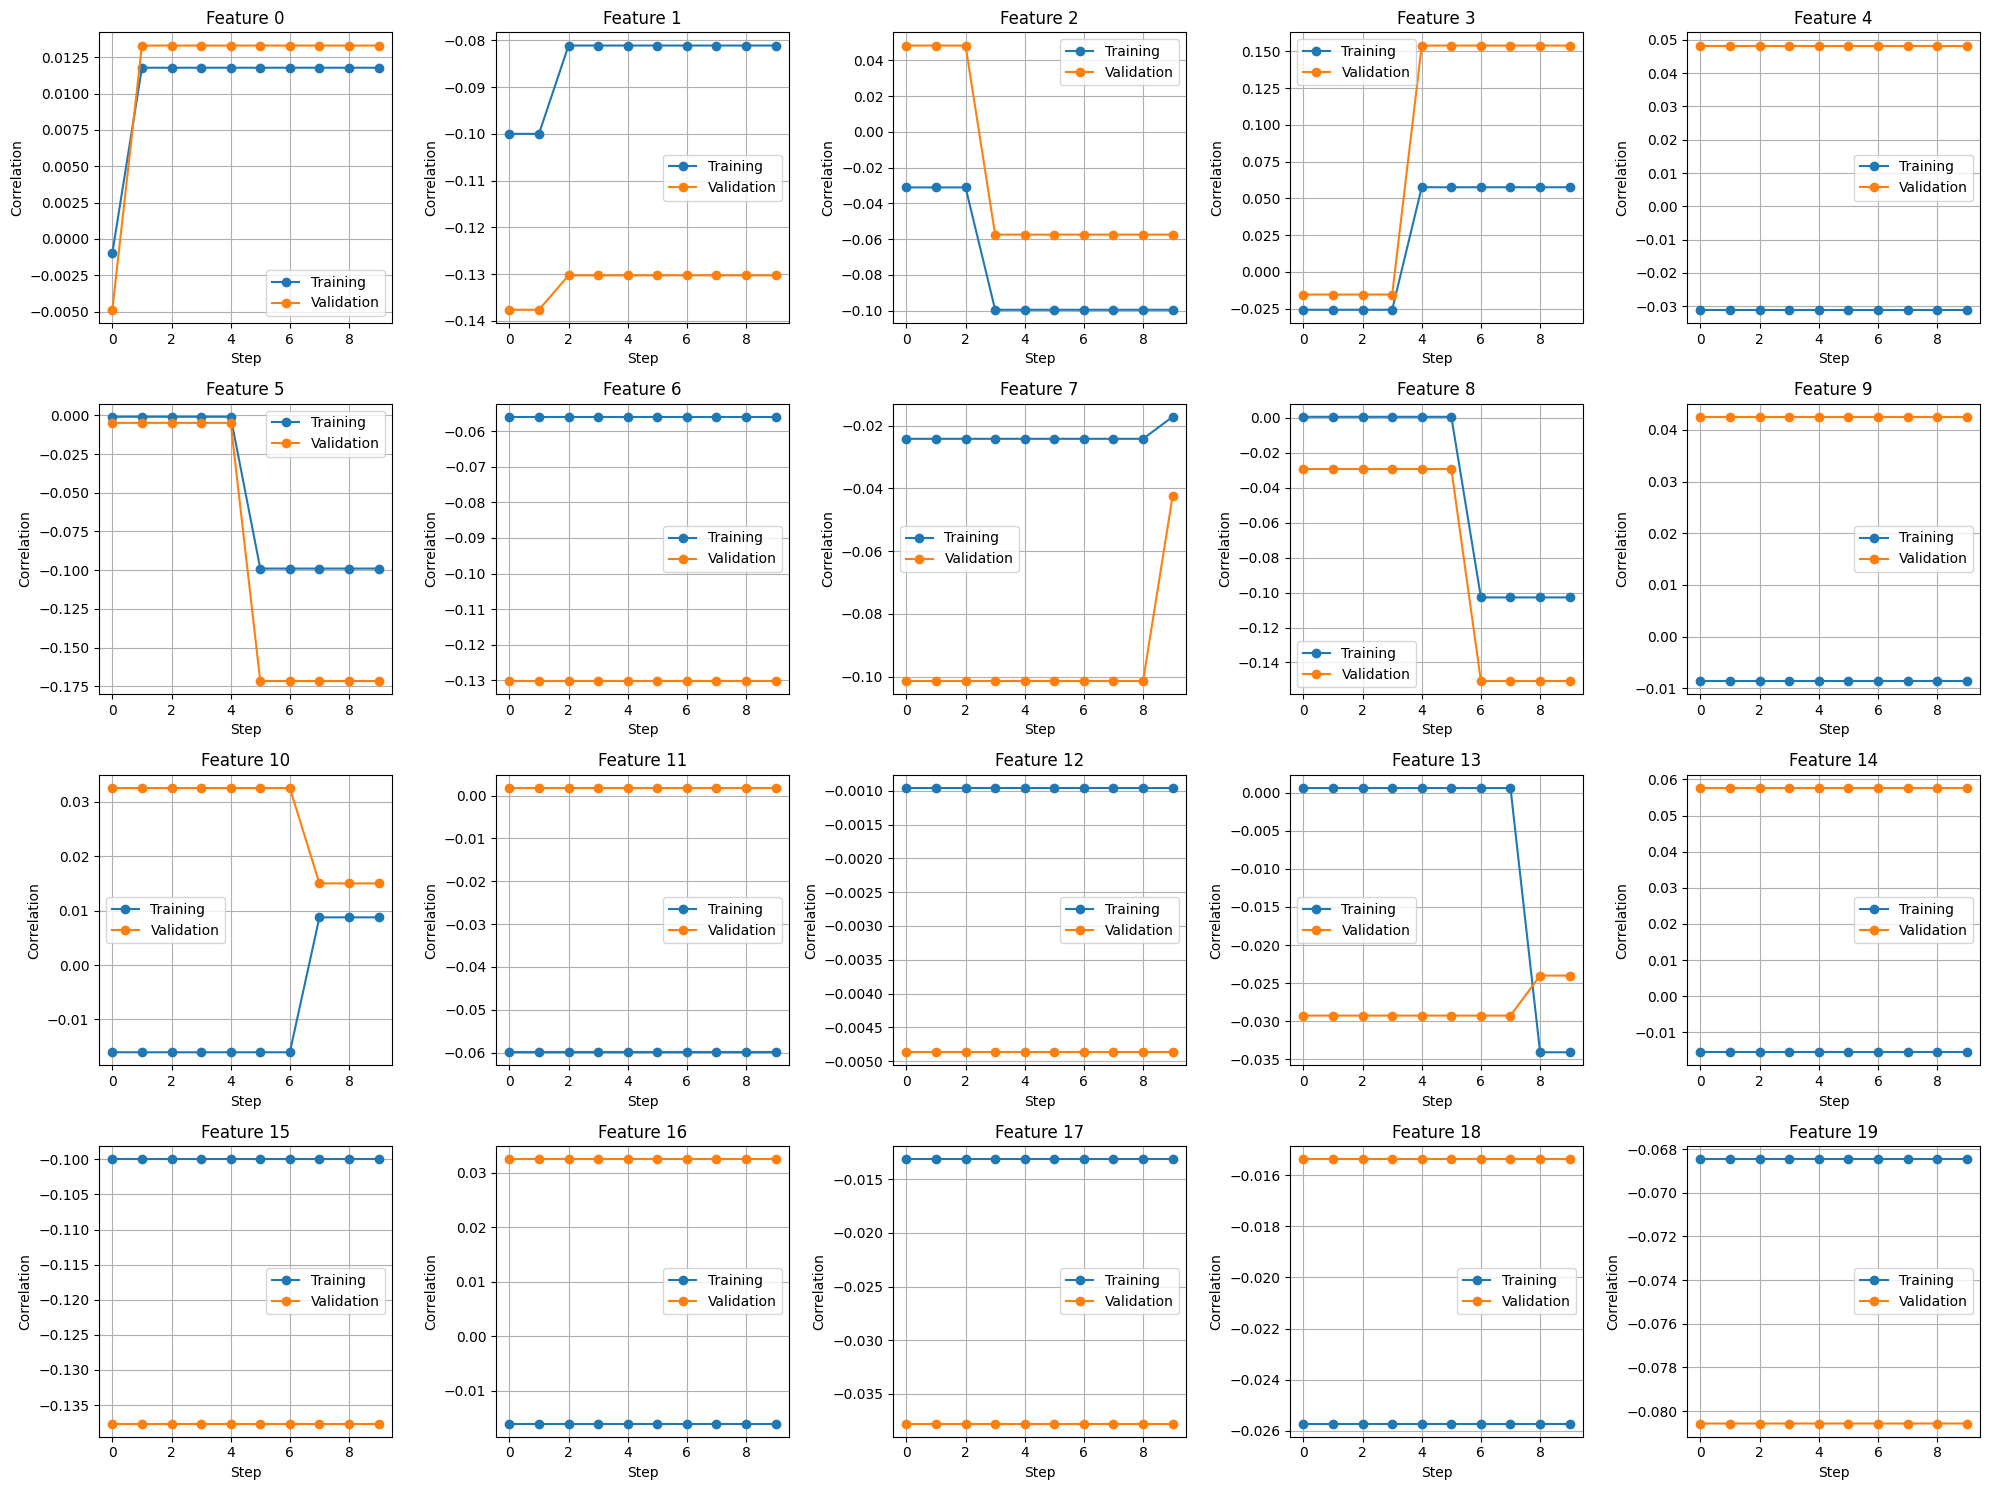

In [ ]:
# Get the list of unique features
features = train_data["lineKey"].unique()

# Set up the grid for subplots
num_features = len(features)
rows = 4  # Number of rows in the grid
cols = 5  # Number of columns in the grid

fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, feature in enumerate(features):
    # Filter data for the specific feature
    train_feature_data = train_data[train_data["lineKey"] == feature]
    val_feature_data = val_data[val_data["lineKey"] == feature]

    # Plot the training and validation correlations
    axes[i].plot(train_feature_data["step"], train_feature_data["lineVal"], label="Training", marker="o")
    axes[i].plot(val_feature_data["step"], val_feature_data["lineVal"], label="Validation", marker="o")

    # Add labels and title
    axes[i].set_title(f"{feature}")
    axes[i].set_xlabel("Step")
    axes[i].set_ylabel("Correlation")
    axes[i].grid(True)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.savefig("correlation_charts.png", format="png", dpi=300)  # Save as PNG with high resolution
plt.show()